In [1]:
from functools import reduce
import pandas as pd
import numpy as np
import re

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 320)

data = pd.read_csv("Living Towards a Stress Free Life.csv")
new_columns = ["Time Stamp"] + [f"Q{i}" for i in range(1, len(data.columns))]
question_map = {index: question for index, question in zip(new_columns, data.columns)}
data.columns = new_columns
data.head()

,Time Stamp,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,Q78,Q79,Q80
0,2022/02/10 4:04:38 PM GMT+8,Male,22-24 Years,I am a student (full time),Yes,University,National University of Singapore (NUS),Full Time Student,"Yes, I stay on campus",2-5 Hours,"I have lunchbreaks of 1 to 2 hours, and/or inc...",Stress affects my sleep,Not affected by this,Not affected by this,Very affected by this,Not affected by this,Not affected by this,Not affected by this,Not affected by this,Not affected by this,Not affected by this,2,3,2,Not at all,Not at all,Not at all,"Yes, always","Yes, always",Not at all,"Yes, always",up down,5 Minutes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,Never heard of it,Never heard of it,Never heard of it,Never heard of it,"Yes, this is important for me",Maybe,"Yes, this is important for me",Maybe,"Yes, this is important for me",Not affected by this,Not affected by this,30 Minutes to 1 Hour,30 Minutes to 1 Hour,<$10,<$10,Yes,NaN,NaN,Thank you - End here,NaN,NaN
1,2022/02/10 4:14:47 PM GMT+8,Female,22-24 Years,I am a student (full time),Yes,University,National University of Singapore (NUS),Full Time Student,"No I do not, and I live about 2-5 MRT stations...",5-10 Hours,I only have one lunchbreak of 30 mins to 1 hour,"I am not bothered by stress usually, but it co...",Not affected by this,It affects me occasionally,Very affected by this,It affects me occasionally,Not affected by this,Not affected by this,Not affected by this,Not affected by this,Not affected by this,6,7,5,"Yes, always","Yes, always","Yes, always",Sometimes,Sometimes,Sometimes,"Yes, always",Reading bible,20-30 Minutes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No, not at all",Never heard of it,I have heard some good news,I have heard some good news,Never heard of it,"Yes, this is important for me","Yes, this is important for me","Yes, this is important for me","Yes, this is important for me","Yes, this is important for me","Yes, this is important for me",Maybe,30 Minutes to 1 Hour,30 Minutes to 1 Hour,>$50,$10-$20,Maybe,Potential sexual harrasment problems (eg. Vide...,NaN,Thank you - End here,NaN,NaN
2,2022/02/10 4:16:30 PM GMT+8,Male,22-24 Years,I am a student (full time),Yes,University,National University of Singapore (NUS),Full Time Student,"Yes, I stay on campus","20-40 Hours, I work on campus","I have lunchbreaks of 1 to 2 hours, and/or inc...",Stress affects my social interactions;Stress a...,Not affected by this,Very affected by this,Not affected by this,It affects me occasionally,It affects me occasionally,Not affected by this,Not affected by this,Not affected by this,Not affected by this,6,8,3,Not at all,Not at all,Not at all,Sometimes,"Yes, always",Not at all,"Yes, always",no,10-20 Minutes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,I have good experiences with it,Never heard of it,Never heard of it,Never heard of it,Maybe,Maybe,Maybe,Maybe,"Yes, this is important for me","Yes, this is important for me",Not affected by this,10-15 Minutes,10-15 Minutes,$20-$30,$10-$20,Maybe,stigma,NaN,Thank you - End here,NaN,NaN
3,2022/02/10 4:18:20 PM GMT+8,Male,18-20 Years,I am a student (full time),Yes,University,National University of Singapore (NUS),Full Time Student,"No I do not, and I live much further than the ...","Zero, everything is online for me",My schedule is not fixed and I have very flexi...,I am not bothered by stress at all,Not affected by this,Not affected by this,Not affected by this,Not affected by this,Not affected by this,Not affected by this,Not affected by this,Not affected by this,Not affected by th

In [2]:
# Subset data to those of interest
# [1:10, 21:33, 34, 39, 48:50, 59, 71:75]
interest = [i for i in range(1, 11)] + [i for i in range(21, 31)] + [32, 33, 34] + [39] + [i for i in range(48, 51)] + [59] + [i for i in range(71, 76)]
interested = data.loc[:, [f"Q{i}" for i in interest]]

In [3]:
# Aggregate questions with multiple choice
# Only interested in Q24 - Q30 for now
mult_choice = [(24, 30), (35, 38), (40, 47), (64, 70)]

subset1 = interested.loc[:, "Q24":"Q30"]

# Question 24-30: Techniques for Relaxation
# Aggregate based on how well their preferred relaxation techniques
# align with what we can provide
q24 = [0, 1, 2]
q25 = [0, 1, 2]
q26 = [0, 4, 8]
q27 = [0, -2, -4]
q28 = [0, -1, -2]
q29 = [0, 2, 4]
q30 = [0, 1, 2]
maps = [q24, q25, q26, q27, q28, q29, q30]
answers = subset1["Q24"].unique()

columns = subset1.columns
for i in range(len(maps)):
    score = maps[i]
    scoremap = {answers[j]: score[j] for j in range(3)}
    subset1[columns[i]].replace(scoremap, inplace = True)

q24_30 = np.sum(subset1, axis = 1)
data1 = interested.drop(columns = [f"Q{i}" for i in range(24, 31)])
data1 = data1.assign(**{"Q24-30": q24_30})
data1.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q21,Q22,Q23,Q32,Q33,Q34,Q39,Q48,Q49,Q50,Q59,Q71,Q72,Q73,Q74,Q75,Q24-30
0,Male,22-24 Years,I am a student (full time),Yes,University,National University of Singapore (NUS),Full Time Student,"Yes, I stay on campus",2-5 Hours,"I have lunchbreaks of 1 to 2 hours, and/or inc...",2,3,2,5 Minutes,No,NaN,NaN,NaN,NaN,NaN,Maybe,30 Minutes to 1 Hour,30 Minutes to 1 Hour,<$10,<$10,Yes,-2
1,Female,22-24 Years,I am a student (full time),Yes,University,National University of Singapore (NUS),Full Time Student,"No I do not, and I live about 2-5 MRT stations...",5-10 Hours,I only have one lunchbreak of 30 mins to 1 hour,6,7,5,20-30 Minutes,No,NaN,NaN,NaN,NaN,NaN,"No, not at all",30 Minutes to 1 Hour,30 Minutes to 1 Hour,>$50,$10-$20,Maybe,5
2,Male,22-24 Years,I am a student (full time),Yes,University,National University of Singapore (NUS),Full Time Student,"Yes, I stay on campus","20-40 Hours, I work on campus","I have lunchbreaks of 1 to 2 hours, and/or inc...",6,8,3,10-20 Minutes,No,NaN,NaN,NaN,NaN,NaN,Maybe,10-15 Minutes,10-15 Minutes,$20-$30,$10-$20,Maybe,-4
3,Male,18-20 Years,I am a student (full time),Yes,University,National University of Singapore (NUS),Full Time Student,"No I do not, and I live much further than the ...","Zero, everything is online for me",My schedule is not fixed and I have very flexi...,1,1,1,5 Minutes,No,NaN,NaN,NaN,NaN,NaN,Maybe,>1 Hour,>1 Hour,$30-$40,$30-$40,Yes,-2
4,Female,22-24 Years,I am working (full time),No,NaN,NaN,NaN,NaN,NaN,NaN,1,1,4,>2 Hours,No,NaN,NaN,NaN,NaN,NaN,Maybe,20-30 Minutes,20-30 Minutes,$40-$50,$40-$50,Yes,7


In [4]:
# Drop nas
critical = ["Q5-Q10", "Q9"]

# If they have more than 4 NAs from Q5 - Q10, drop
subset3 = data1.loc[:, "Q5":"Q10"]
drop_idx = subset3[np.sum(subset3.isna(), axis = 1) > 4].index
data1d5 = data1.drop(index = drop_idx)

# If they have NA for Q9, drop
# Turns out all were dropped from above
data2 = data1d5.fillna(0)

# Cleaning Q10
def find_time(string):
    array = string.split(";")
    if len(array) == 1:
        return array[0]
    else:
        for ans in array:
            if re.search("[0-9]+", ans):
                return ans
            else:
                return array[0]

data2["Q10"] = data2["Q10"].apply(find_time)

In [5]:
# Converting ordinal variables
ordinals = ["Q2", "Q9", "Q10", "Q21", "Q22", "Q23", "Q32", "Q48", "Q49", "Q71", "Q72", "Q73", "Q74", "Q24-30"]
data2d5 = data2.copy()

def clean_ordinal_value(series):
    def clean(value):
        if type(value) == str:
            value = re.sub("Zero", "0", value)
            value = re.sub(" to ", "-", value)
            if re.search("(Minutes)|(mins)", value):
                matched = re.findall("[0-9]+", value)
                hours = [str(round(int(mins)/60, 2)) if mins != "1" else "1" for mins in matched]
                for i in range(len(matched)):
                    value = re.sub(matched[i], hours[i], value)
            cleaned = re.sub("[A-Za-z,\\/\\;\\s$]+", "", value)
            return cleaned if len(cleaned) > 0 else -1
        else:
            return value

    return series.apply(clean)
    
def to_numeric(series):
    def convert(value):
        if type(value) == str:
            if "-" in value:
                interval = list(map(float, value.split("-")))
                mean = reduce(lambda x, y: (x+y)//2, interval)
                return mean
            elif ">" in value or "<" in value:
                return float(value[1:])
            else:
                return float(value)
        else:
            return value
    
    return series.apply(convert)

data2d5[ordinals] = data2d5[ordinals].apply(clean_ordinal_value).apply(to_numeric)
data2d5.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q21,Q22,Q23,Q32,Q33,Q34,Q39,Q48,Q49,Q50,Q59,Q71,Q72,Q73,Q74,Q75,Q24-30
0,Male,23.0,I am a student (full time),Yes,University,National University of Singapore (NUS),Full Time Student,"Yes, I stay on campus",3.0,1.0,2,3,2,0.08,No,0,0,0.0,0.0,0,Maybe,0.0,0.0,10.0,10.0,Yes,-2
1,Female,23.0,I am a student (full time),Yes,University,National University of Singapore (NUS),Full Time Student,"No I do not, and I live about 2-5 MRT stations...",7.0,0.0,6,7,5,0.00,No,0,0,0.0,0.0,0,"No, not at all",0.0,0.0,50.0,15.0,Maybe,5
2,Male,23.0,I am a student (full time),Yes,University,National University of Singapore (NUS),Full Time Student,"Yes, I stay on campus",30.0,1.0,6,8,3,0.00,No,0,0,0.0,0.0,0,Maybe,0.0,0.0,25.0,15.0,Maybe,-4
3,Male,19.0,I am a student (full time),Yes,University,National University of Singapore (NUS),Full Time Student,"No I do not, and I live much further than the ...",0.0,-1.0,1,1,1,0.08,No,0,0,0.0,0.0,0,Maybe,1.0,1.0,35.0,35.0,Yes,-2
5,Male,23.0,I am a student (full time),Yes,University,Nanyang Technological University (NTU),Full Time Student,"No I do not, and I live much further than the ...",3.0,1.0,3,3,3,0.00,No,0,0,0.0,0.0,0,"Yes, absolutely",0.0,1.0,50.0,35.0,Yes,8


In [6]:
# Converting categoricals
categoricals = [x for x in data1.columns if x not in ordinals]
data3 = pd.get_dummies(data2d5, columns = categoricals, drop_first = True)

data3.head()

,Q2,Q9,Q10,Q21,Q22,Q23,Q32,Q48,Q49,Q71,Q72,Q73,Q74,Q24-30,Q1_Male,Q3_I am a student (full time),Q3_I am working (full time),Q3_Semi-retired,Q6_National University of Singapore (NUS),Q6_Others,Q7_Exchange student,Q7_Full Time Student,Q7_Teacher / professor,"Q8_No I do not, and I live much further than the above options","Q8_No I do not, but I live about 1-5 bus stops away","Q8_Yes, I stay on campus",Q33_Yes,Q34_I only have to do it once a month to get the best results from it,Q39_No,Q39_Yes,"Q50_No, not at all","Q50_Yes, absolutely",Q59_Maybe,"Q59_No, not at all","Q59_Yes, absolutely",Q75_Maybe,Q75_No,Q75_Yes
0,23.0,3.0,1.0,2,3,2,0.08,0.0,0.0,0.0,0.0,10.0,10.0,-2,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,23.0,7.0,0.0,6,7,5,0.00,0.0,0.0,0.0,0.0,50.0,15.0,5,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,23.0,30.0,1.0,6,8,3,0.00,0.0,0.0,0.0,0.0,25.0,15.0,-4,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,19.0,0.0,-1.0,1,1,1,0.08,0.0,0.0,1.0,1.0,35.0,35.0,-2,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,23.0,3.0,1.0,3,3,3,0.00,0.0,0.0,0.0,1.0,50.0,35.0,8,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


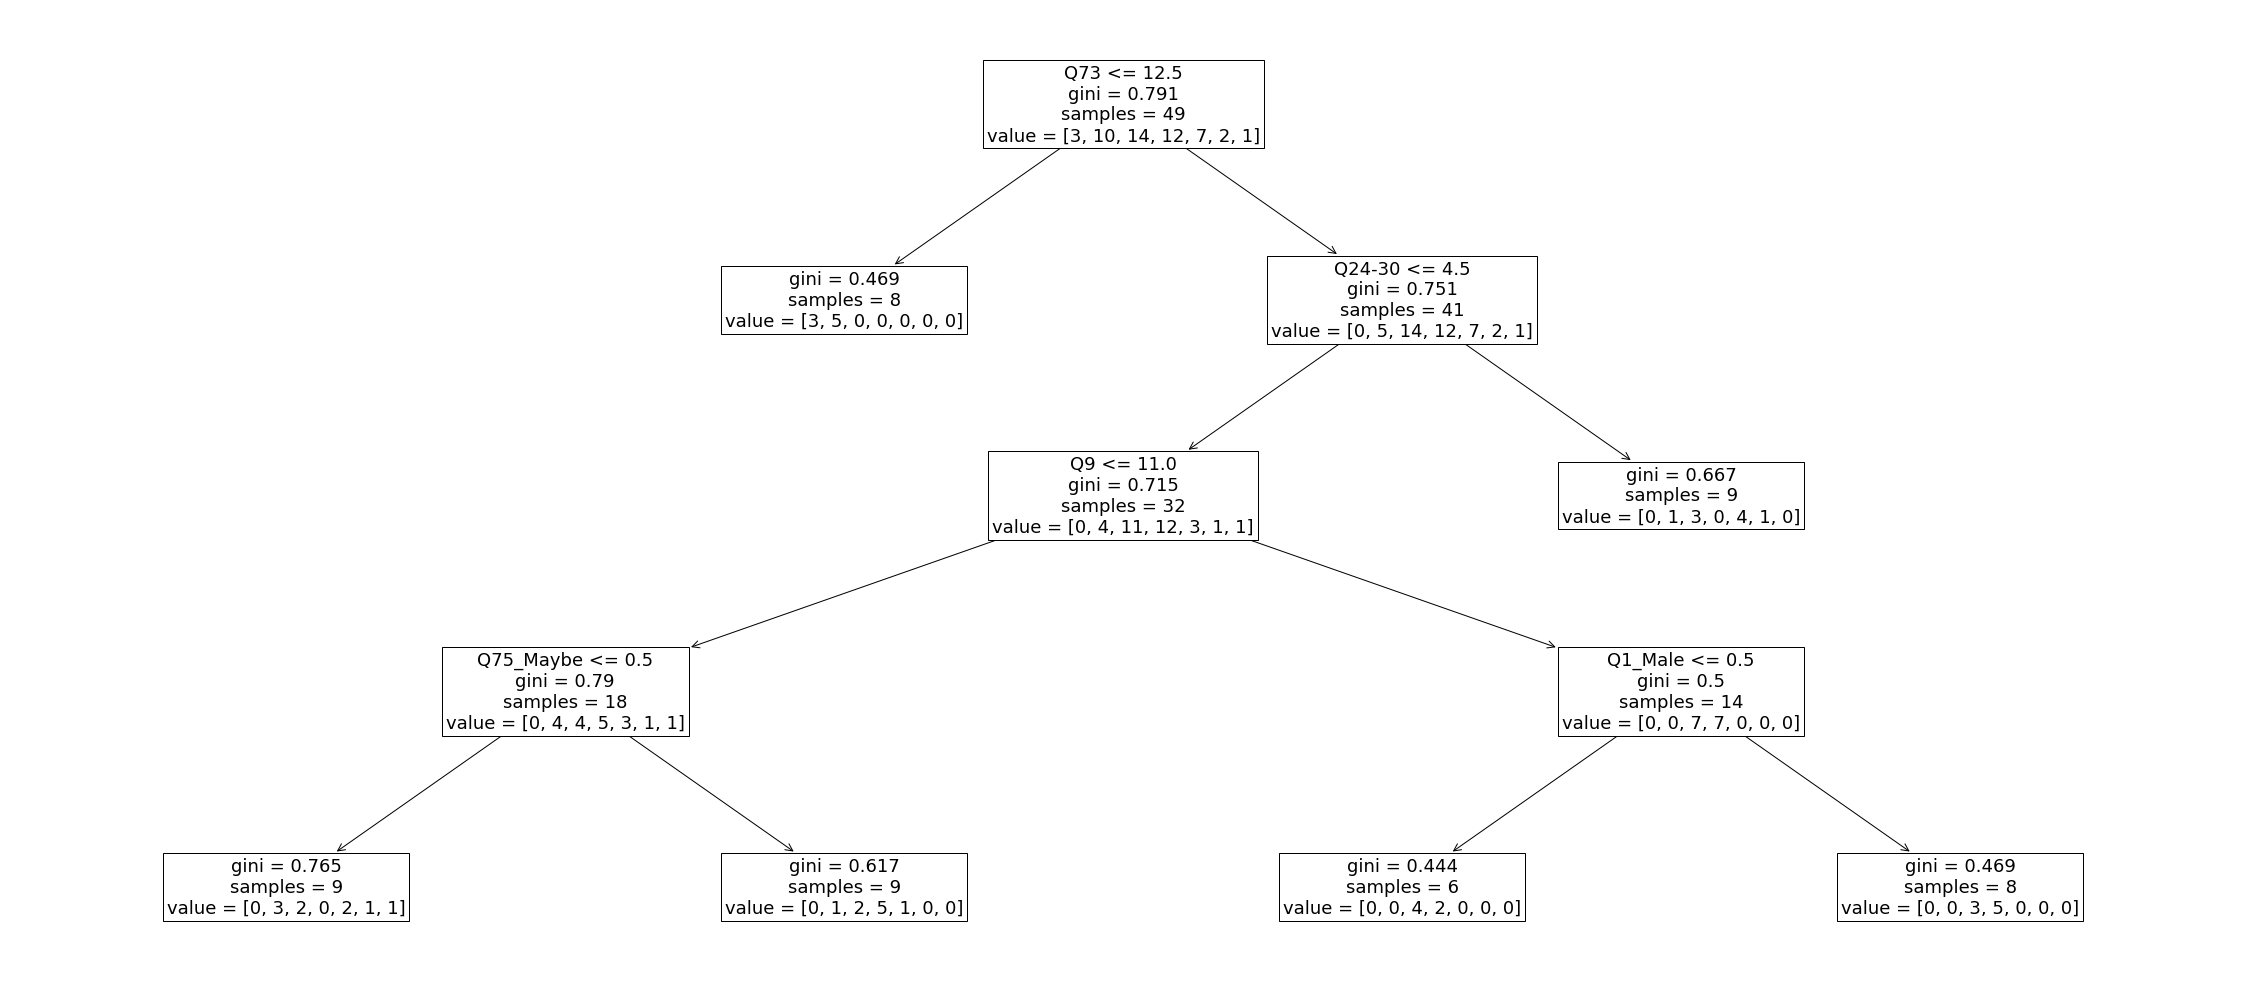

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Turn target to ordered categorical
cat = sorted(data3["Q74"].unique())
data3["Q74"] = pd.Categorical(data3["Q74"], categories = cat, ordered = True)

# Run baseline linear regression
target = data3["Q74"]
fields = data3[[x for x in data3.columns if x != "Q74"]]

model = DecisionTreeClassifier(min_samples_leaf = 6)
model.fit(fields, target)

plt.figure(figsize = (40, 18))
plot_tree(model, fontsize = 18, feature_names = fields.columns)
plt.show()

In [13]:
sorted(data3["Q74"].unique())

[0.0, 10.0, 15.0, 25.0, 35.0, 45.0, 50.0]

In [8]:
sorted(data3["Q74"].unique())
for k, v in zip(fields.columns, model.feature_importances_):
    if v > 0:
        print(k, v)

Q9 0.16326016351215145
Q73 0.41528835884170295
Q24-30 0.18822267262878656
Q1_Male 0.05762123418075936
Q75_Maybe 0.17560757083659959


In [9]:
# How stressed in the past month? Q22
data["Q22"].describe()

count    55.000000
mean      6.109091
std       2.322776
min       1.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Q22, dtype: float64

In [10]:
# Do uni students know the importance of addressing stress? Q23, Q24-30
print(data["Q23"].describe())
print(data3["Q24-30"].describe())

count    55.000000
mean      3.600000
std       1.226256
min       1.000000
25%       2.500000
50%       4.000000
75%       5.000000
max       5.000000
Name: Q23, dtype: float64
count    49.000000
mean      1.530612
std       4.435191
min      -6.000000
25%      -2.000000
50%       1.000000
75%       4.000000
max      12.000000
Name: Q24-30, dtype: float64


In [11]:
# How much they think it costs vs how much it actually costs Q73, Q74
sum(data3["Q73"] > data3["Q74"].astype(float))

29

In [12]:
# Number of people willing to try out massage Q75
sum(data["Q75"] == "Yes")

25